In [2]:
#Load all the required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [27]:
#Loading the data set into a data frame
df = pd.read_csv("Suicide Rates Overview 1985 to 2016 Data.CSV")

In [28]:
df.shape

(27820, 12)

In [29]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [31]:
#renaming the column names for convenience
df.columns = ['country', 'year', 'gender', 'age', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

In [32]:
df.describe()

,year,suicide_count,population,suicide_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [33]:
df.isnull().sum()

country               0
year                  0
gender                0
age                   0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [34]:
#TO CHECK IF THERE ARE ANY DUPLICATE ROWS
duplicate = df[df.duplicated()]
duplicate

,country,year,gender,age,suicide_count,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation


SINCE THE DUPLICATE DATA FRAME IS EMPTy, THE DATASET DOES NOT HAVE ANY DUPLICATE ROWS.

In [35]:
null_percentage = df['HDI_for_year'].isnull().sum() / len(df) * 100
null_percentage

69.93529834651329

In [36]:
df=df.drop(['country-year','HDI_for_year'], axis = 1) 

In [37]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(float) #To convert the column into float
  

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   gdp_for_year    27820 non-null  float64
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


In [39]:
df.head()

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers


In [40]:
#Checking number of unique categories for categorical variables
df.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [41]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [42]:
len(df.country.unique())

101

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'suicide_count'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'suicide_rate'}>],
       [<AxesSubplot: title={'center': 'gdp_for_year'}>,
        <AxesSubplot: title={'center': 'gdp_per_capita'}>]], dtype=object)

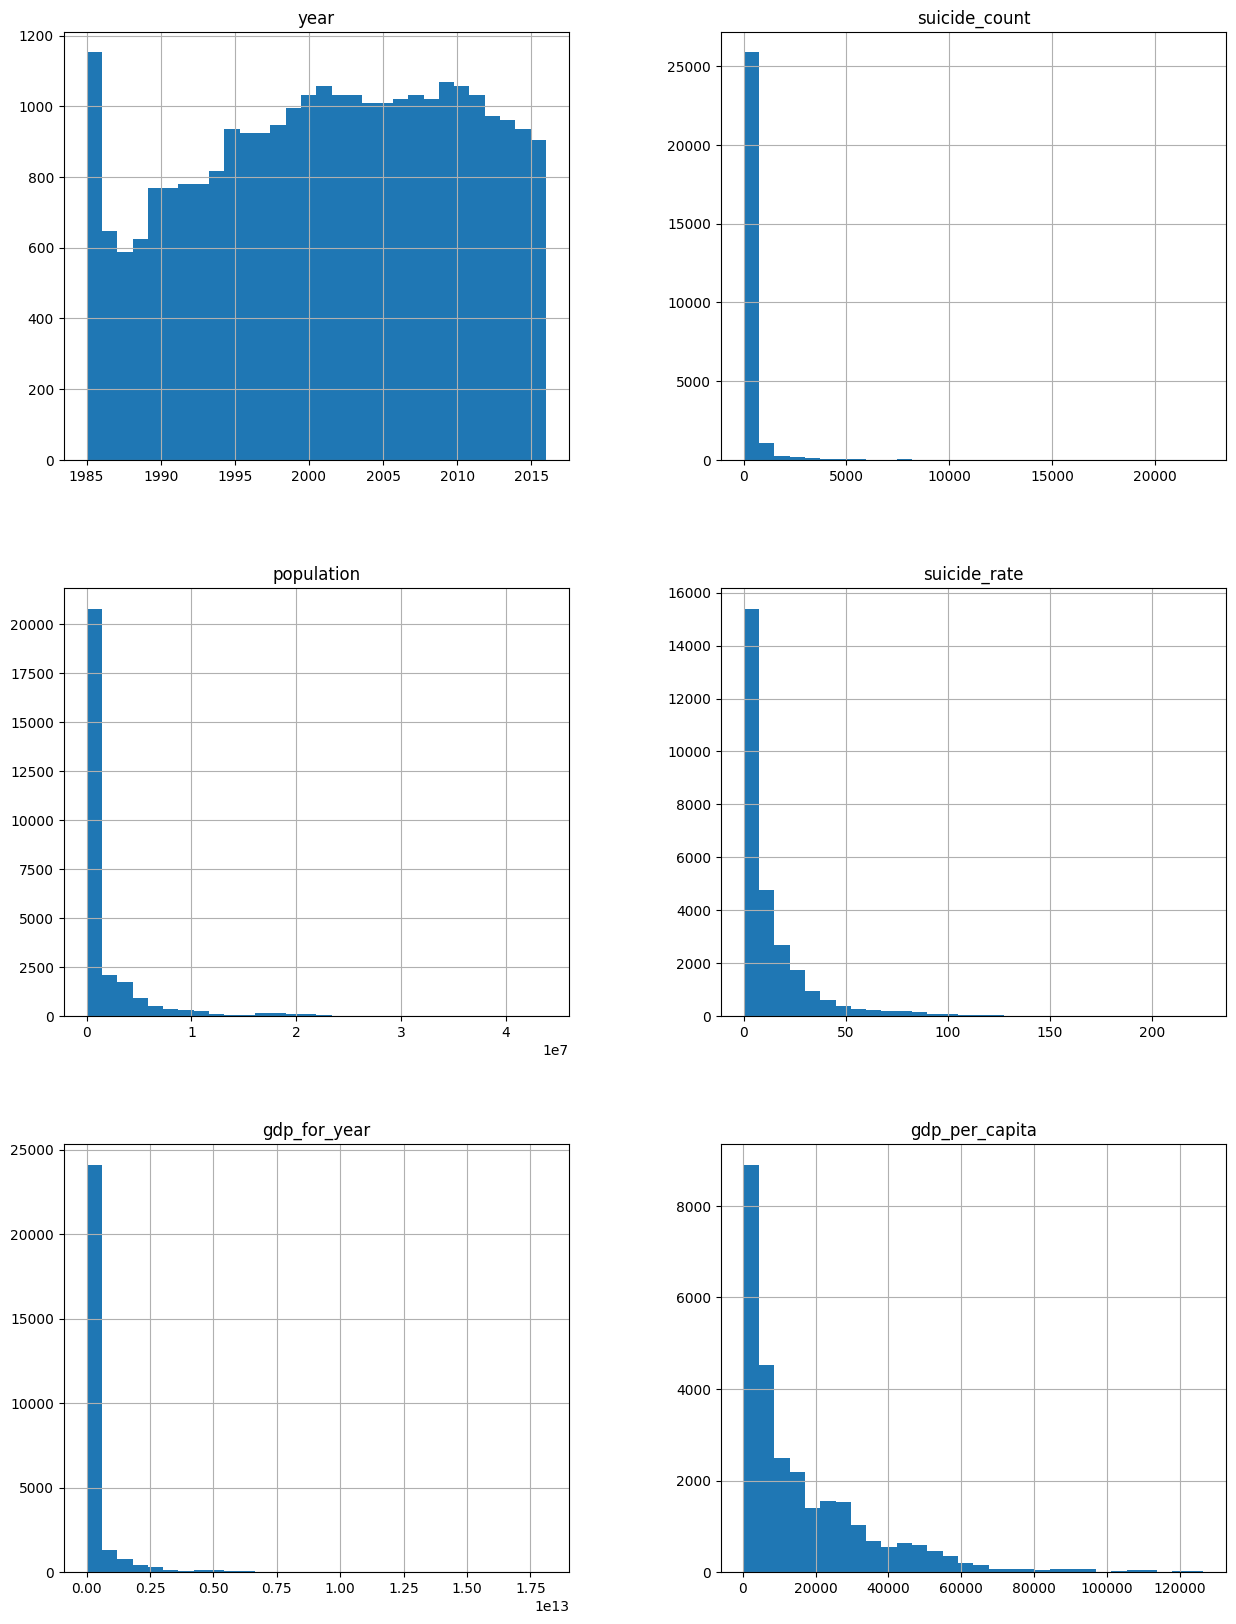

In [43]:
df.hist(bins = 30,figsize = (15,20))

                    year  suicide_count  population  suicide_rate  \
year            1.000000      -0.004546    0.008850     -0.039037   
suicide_count  -0.004546       1.000000    0.616162      0.306604   
population      0.008850       0.616162    1.000000      0.008285   
suicide_rate   -0.039037       0.306604    0.008285      1.000000   
gdp_for_year    0.094529       0.430096    0.710697      0.025240   
gdp_per_capita  0.339134       0.061330    0.081510      0.001785   

                gdp_for_year  gdp_per_capita  
year                0.094529        0.339134  
suicide_count       0.430096        0.061330  
population          0.710697        0.081510  
suicide_rate        0.025240        0.001785  
gdp_for_year        1.000000        0.303405  
gdp_per_capita      0.303405        1.000000  


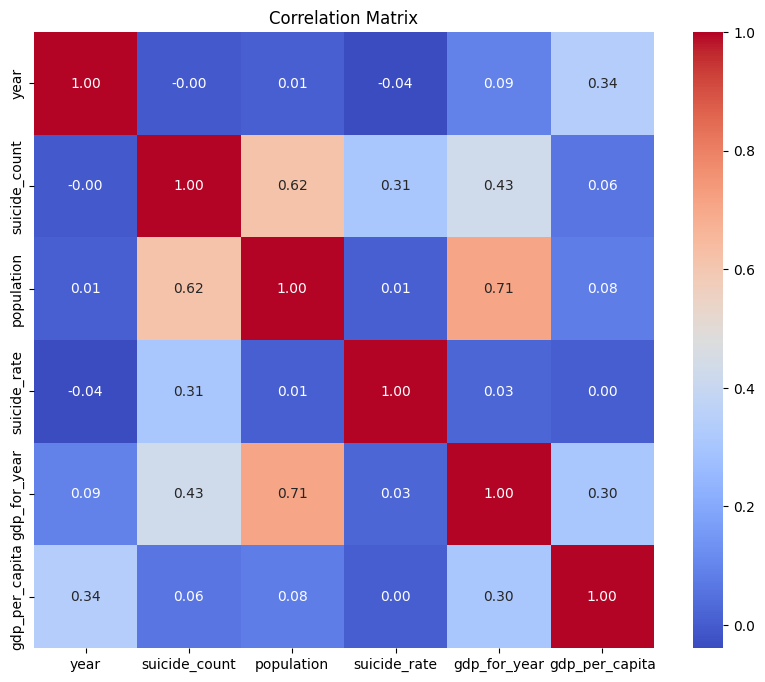

In [44]:
# Relationships between variables
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

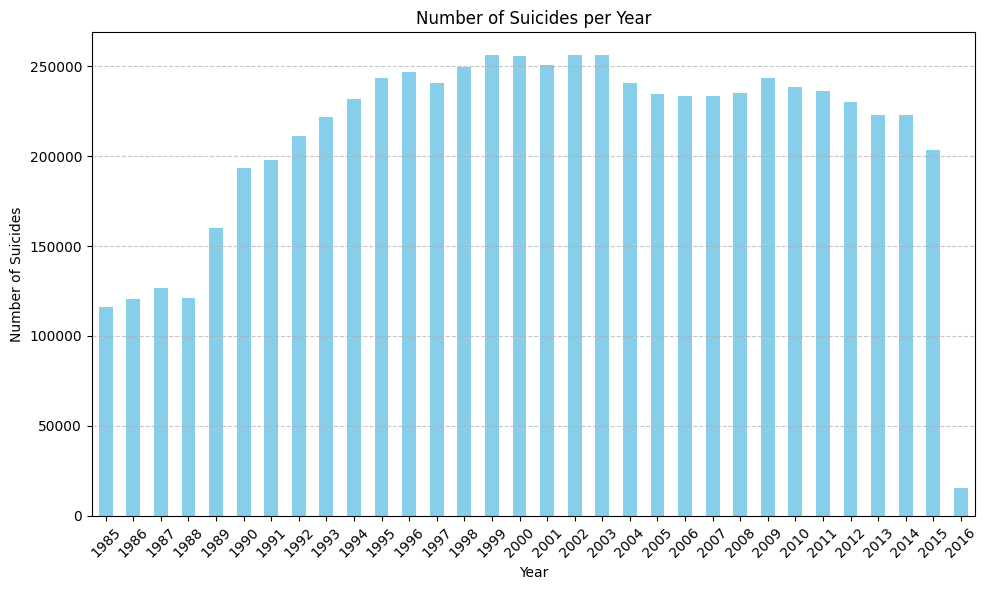

In [53]:
suicides_per_year = df.groupby('year')['suicide_count'].sum()

# Creating the bar plot
plt.figure(figsize=(10, 6))
suicides_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

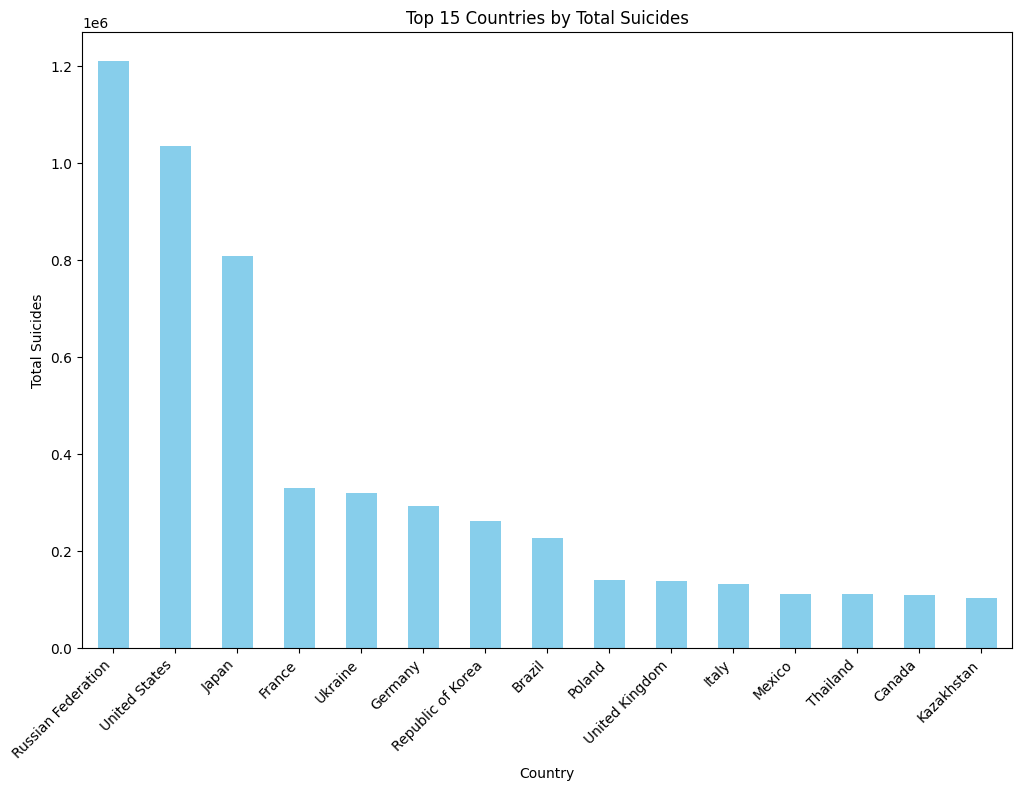

In [48]:
import matplotlib.pyplot as plt

# Calculate total suicides per country
suicides_by_country = df.groupby('country')['suicide_count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
suicides_by_country.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Countries by Total Suicides')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45, ha='right')
plt.show()

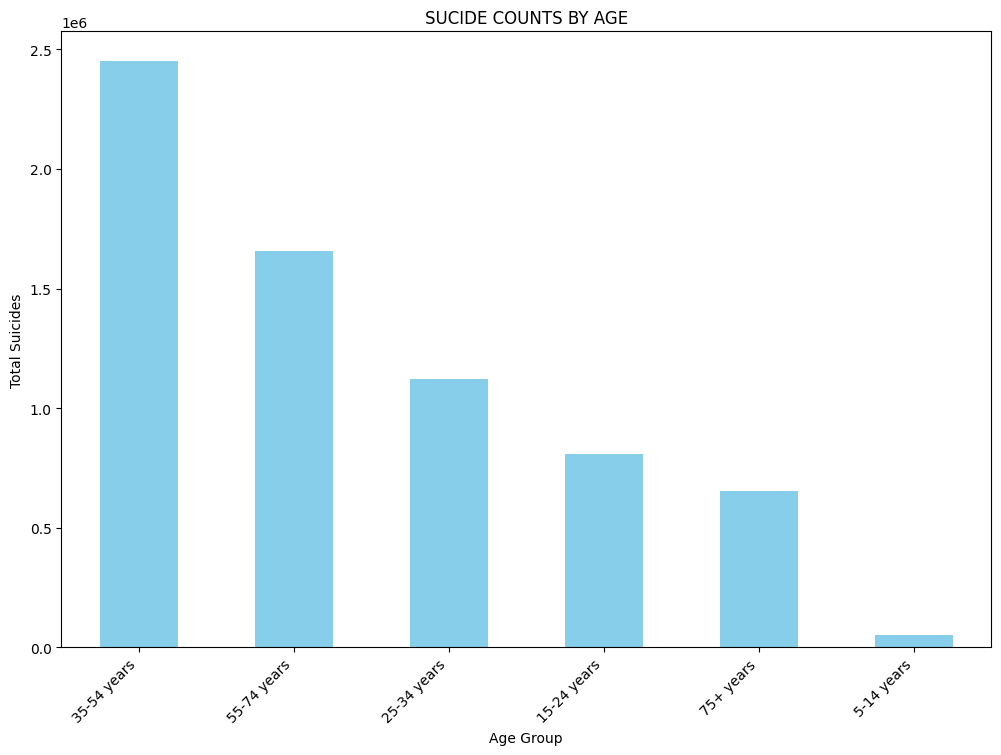

In [52]:
import matplotlib.pyplot as plt

# Calculate total suicides per country
suicides_by_country = df.groupby('age')['suicide_count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
suicides_by_country.plot(kind='bar', color='skyblue')
plt.title('SUCIDE COUNTS BY AGE')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45, ha='right')
plt.show()

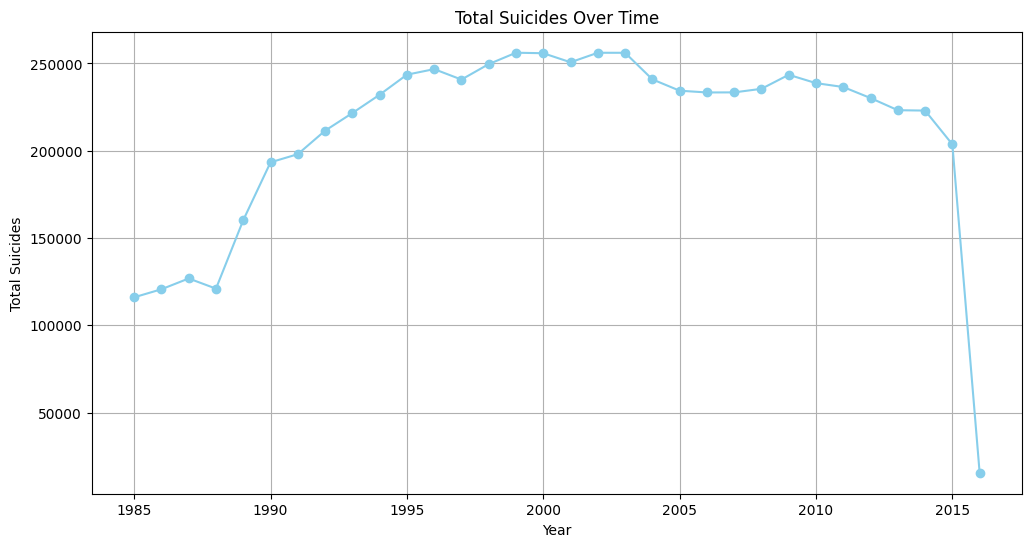

In [54]:
# Group by year and calculate total suicides per year
suicides_over_time = df.groupby('year')['suicide_count'].sum()

# Plotting
plt.figure(figsize=(12, 6))
suicides_over_time.plot(color='skyblue', marker='o', linestyle='-')
plt.title('Total Suicides Over Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()